In [1]:
import pytorch_lightning as pl
from models.inpainting_model import InpaintingModel
from models.flow_model import FlowModel
from models.occlusion_model import OcclusionModel
from models.flow_occ_model import FlowOccModel
from models.networks.lightning_datamodule import ImageFlowOccModule
from models.data.utils.flow_utils import flow2img
import matplotlib.pyplot as plt
import torch
# flow occ model should be ['simple', 'flowoccnets', 'flowoccnetc', 'pwoc', 'flowoccnet']
# optical flow model should be ['simple', 'flownets', 'flownetc', 'pwc', 'flownet']
# occlusion model should be ['simple', 'occnets', 'occnetc']

hparams = dict(learning_rate=1e-3, batch_size=32, image_size=(512, 1024), model='simple')
root = r'/home/tnguyen/dataset/ycb'
model = FlowModel(root=root, hparams=hparams)


In [2]:
data_module = ImageFlowOccModule(root = root, image_size= (512,1024), batch_size=32)
data_module.prepare_data()
data_module.setup()

In [3]:
dataloader =data_module.train_dataloader()
img, flow, occ = next(iter(dataloader))

In [4]:
img1 = img[0,:3,:,:]
img2 = img[0,3:,:,:]
flow_ = flow[0,:,:,:]
occ_ = occ[0,:,:,:]

In [5]:
img1 = img1.detach().cpu().numpy().transpose(1, 2, 0)
img2 = img2.detach().cpu().numpy().transpose(1, 2, 0)
occ_ = occ_.detach().cpu().numpy().transpose(1, 2, 0)
flow_ = flow_.detach().cpu().numpy().transpose(1, 2, 0)

In [6]:
im_flow = flow2img(flow_)

Text(0.5, 1.0, 'optical flow')

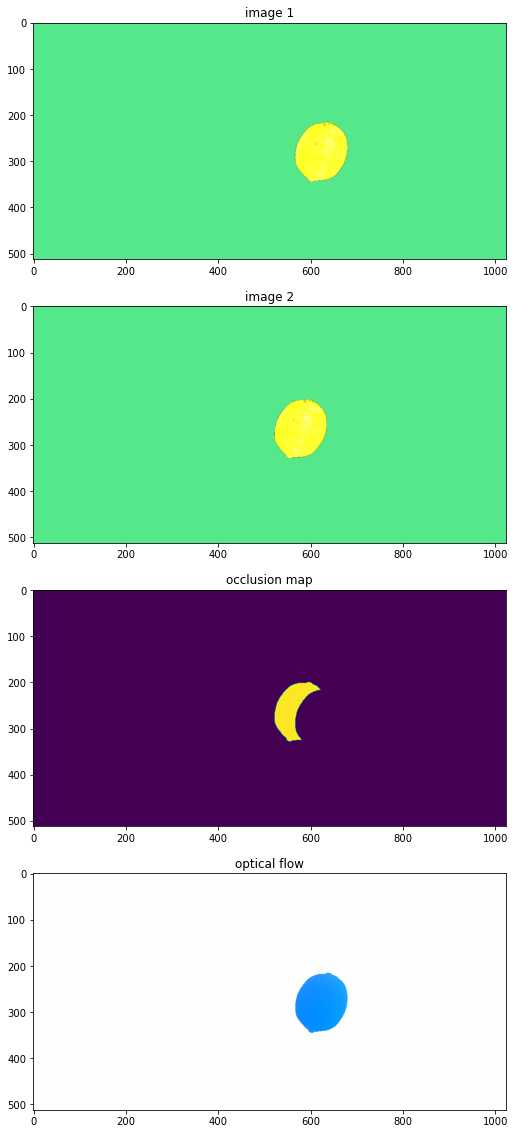

In [7]:

plt.figure(figsize=(12, 4 * 5))
plt.subplot(4, 1, 1)
plt.imshow(img1/2.0 + 0.5)
plt.title('image 1')

plt.subplot(4, 1, 2)
plt.imshow(img2/2.0 + 0.5)
plt.title('image 2')

plt.subplot(4, 1, 3)
plt.imshow(occ_)
plt.title('occlusion map')

plt.subplot(4, 1, 4)
plt.imshow(im_flow)
plt.title('optical flow')

Text(0.5, 1.0, 'optical flow')

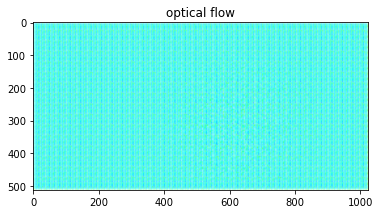

In [8]:

flow_bt = model(torch.unsqueeze(img[0],0))
flow_bt = flow_bt.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
im_flow_bt = flow2img(flow_bt)
plt.imshow(im_flow_bt)
plt.title('optical flow')

In [9]:
#max_epochs = 100

#trainer = pl.Trainer(
#    max_epochs=max_epochs, gpus=1, overfit_batches = 1
#)

#trainer.fit(model, data_module)

Text(0.5, 1.0, 'optical flow after training ')

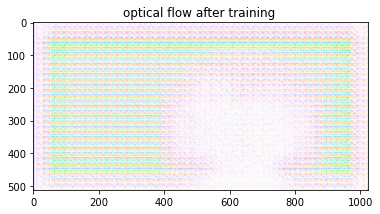

In [10]:
model= model.load_from_checkpoint(checkpoint_path='./lightning_logs/lr=1e-3,simple/checkpoints/epoch=87.ckpt', root = r'/home/tnguyen/dataset/ycb')
flow_at = model(torch.unsqueeze(img[0],0))
flow_at = flow_at.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
im_flow_at = flow2img(flow_at)
plt.imshow(im_flow_at)
plt.title('optical flow after training ')